In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('http://raw.githubusercontent.com/microsoft/Data-Science-For-Beginners/main/data/df.csv')
df.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


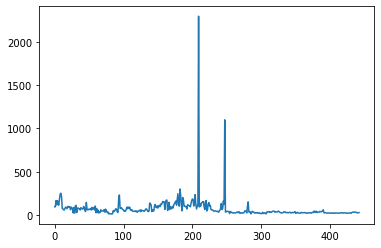

In [6]:
df['MaxWingspan'].plot()
plt.show()

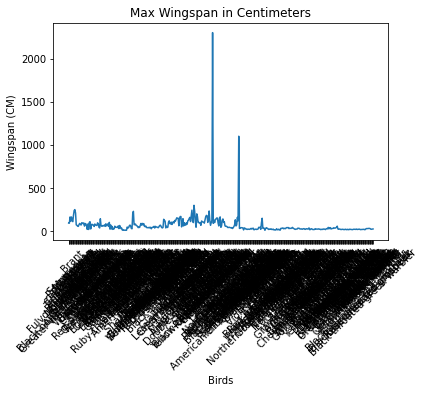

In [8]:
 plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('df')
plt.xticks(rotation=45)
x = df['Name'] 
y = df['MaxWingspan']

plt.plot(x, y)

plt.show()

In [9]:
df.nunique()

Name                  443
ScientificName        443
Category               60
Order                  21
Family                 59
Genus                 238
ConservationStatus      6
MinLength              96
MaxLength             113
MinBodyMass           233
MaxBodyMass           271
MinWingspan           137
MaxWingspan           157
dtype: int64

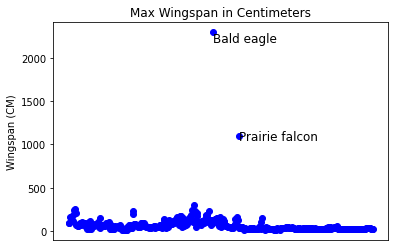

In [11]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(df)):
    x = df['Name'][i]
    y = df['MaxWingspan'][i]
    plt.plot(x, y, 'bo')
    if df['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), df['Name'][i], fontsize=12)
    
plt.show()

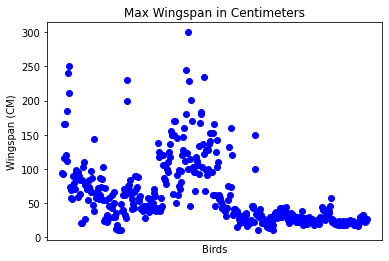

In [12]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
for i in range(len(df)):
    x = df['Name'][i]
    y = df['MaxWingspan'][i]
    if df['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, 'bo')
plt.show()


<AxesSubplot:title={'center':'Birds'}, xlabel='Category'>

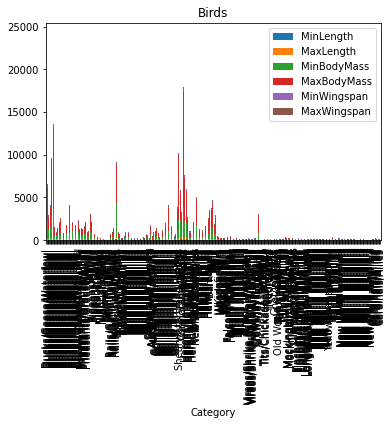

In [13]:
df.plot(x='Category', kind = 'bar', stacked = True, title ='Birds')

<AxesSubplot:>

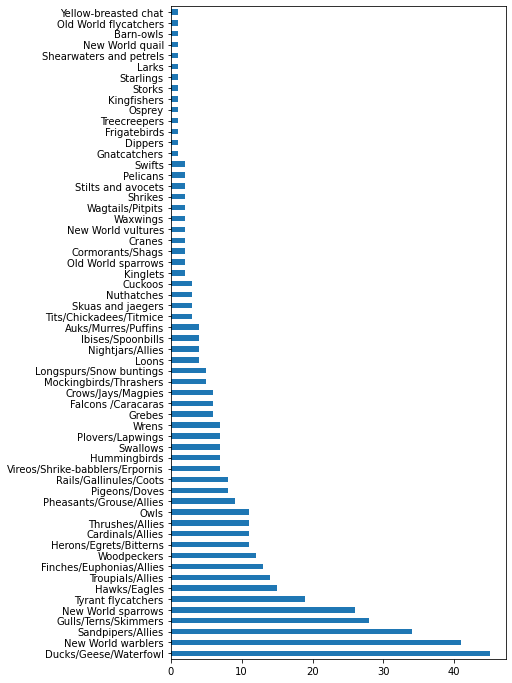

In [17]:
category_count = df.value_counts(df['Category'].values, sort=True)
plt.rcParams['figure.figsize'] = [6, 12]
category_count.plot.barh()

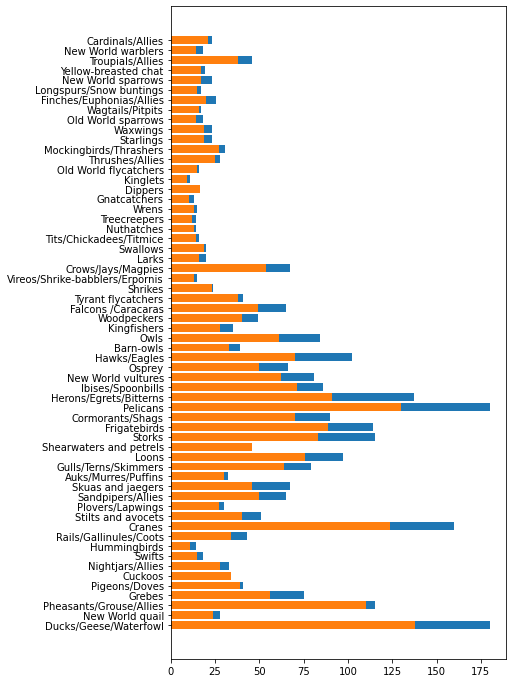

In [21]:
minlength = df['MinLength']
maxlength = df['MaxLength']
category = df['Category']

plt.barh(category,maxlength)
plt.barh(category,minlength)
plt.show()

<AxesSubplot:xlabel='MaxLength', ylabel='Order'>

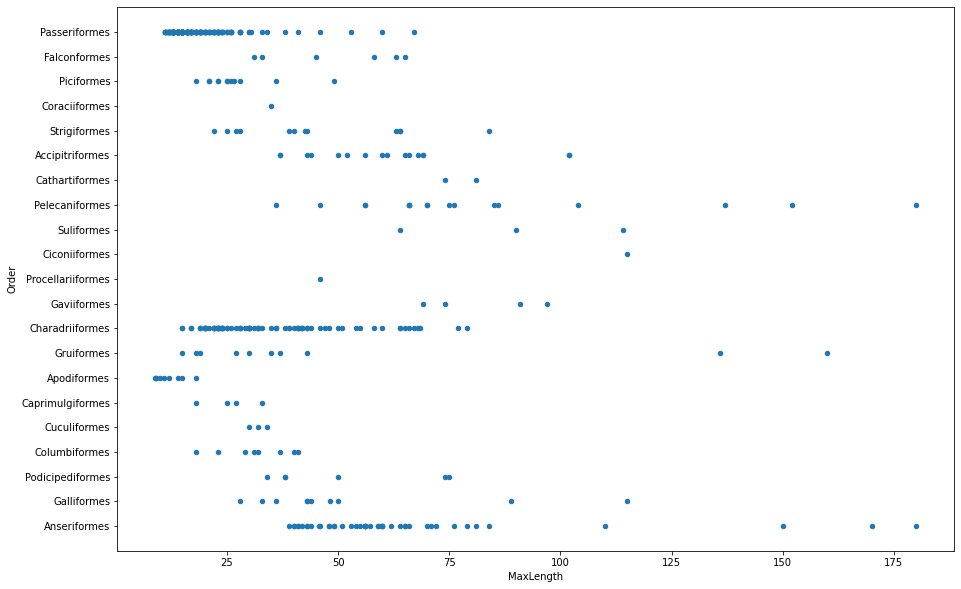

In [24]:
df.plot(kind = 'scatter', x = 'MaxLength', y ='Order', figsize =(15,10))

AttributeError: 'Rectangle' object has no property 'bin'

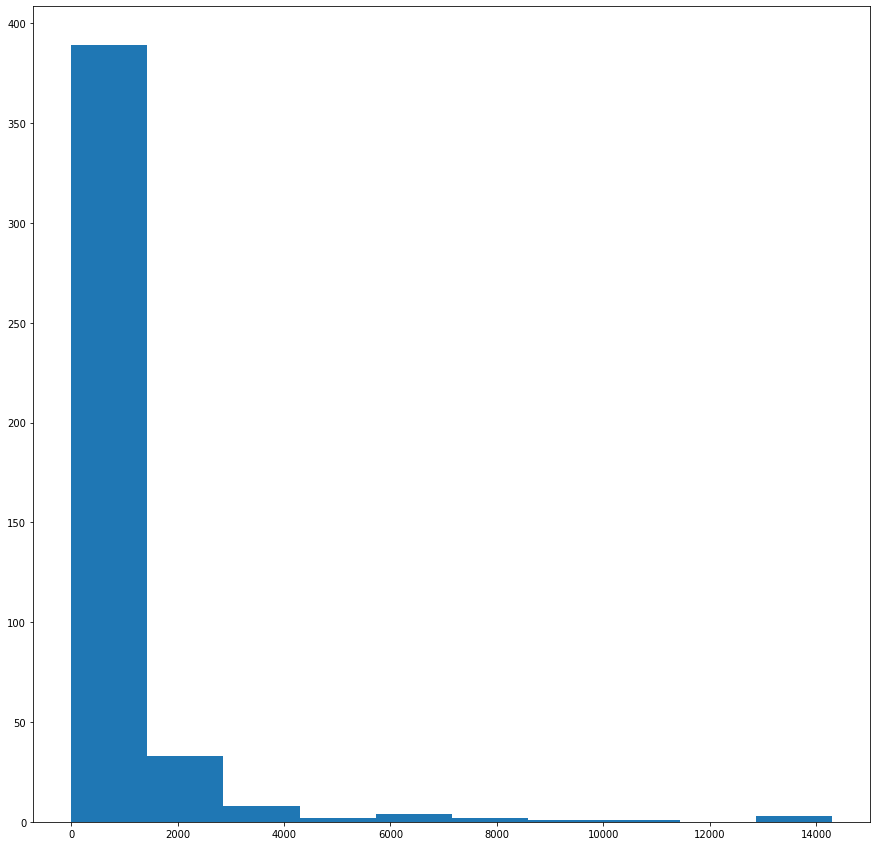

In [25]:
df['MaxBodyMass'].plot(kind ='hist', bin =10, figsize = (15,15))

<function matplotlib.pyplot.show(close=None, block=None)>

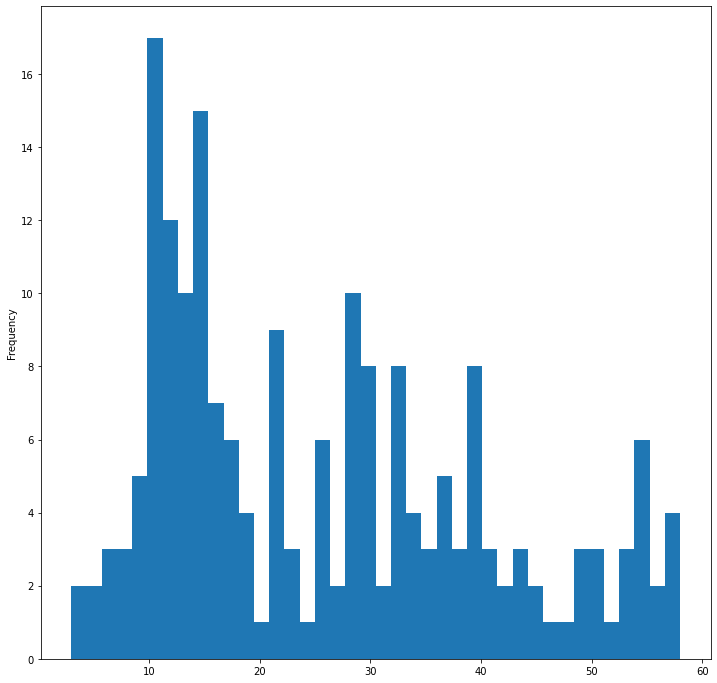

In [31]:



filtereddf = df[(df['MaxBodyMass'] > 1) & (df['MaxBodyMass']< 60)]
filtereddf['MaxBodyMass'].plot(x = 'Category', kind = 'hist', bins =40, figsize = (12,12))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

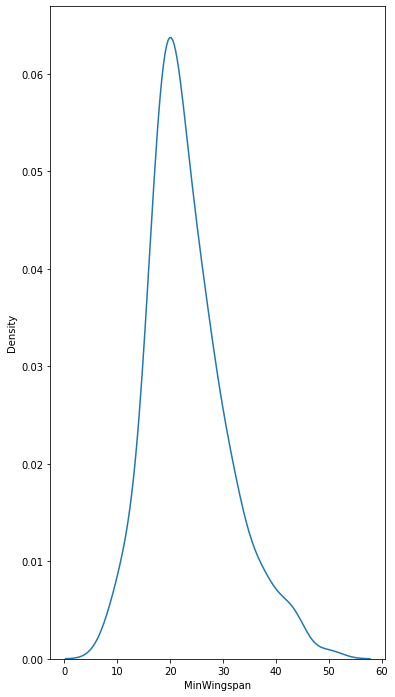

In [32]:
sns.kdeplot(filtereddf['MinWingspan'])
plt.show

c:\Users\CHRIS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\CHRIS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

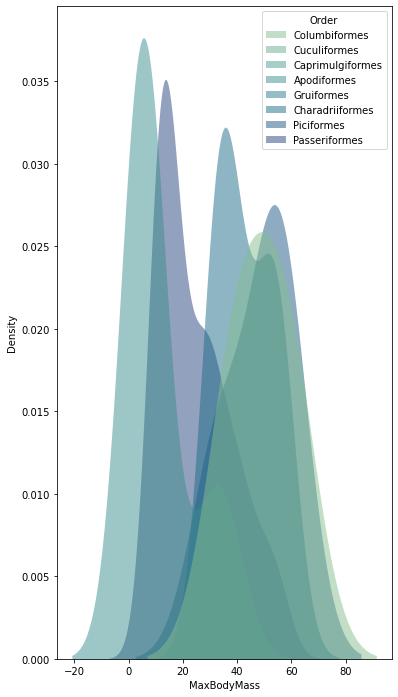

In [38]:
sns.kdeplot(data=filtereddf, x='MaxBodyMass', hue = 'Order',
fill=True, common_norm = False, palette='crest',
alpha =.5, linewidth = 0,
)
plt.show

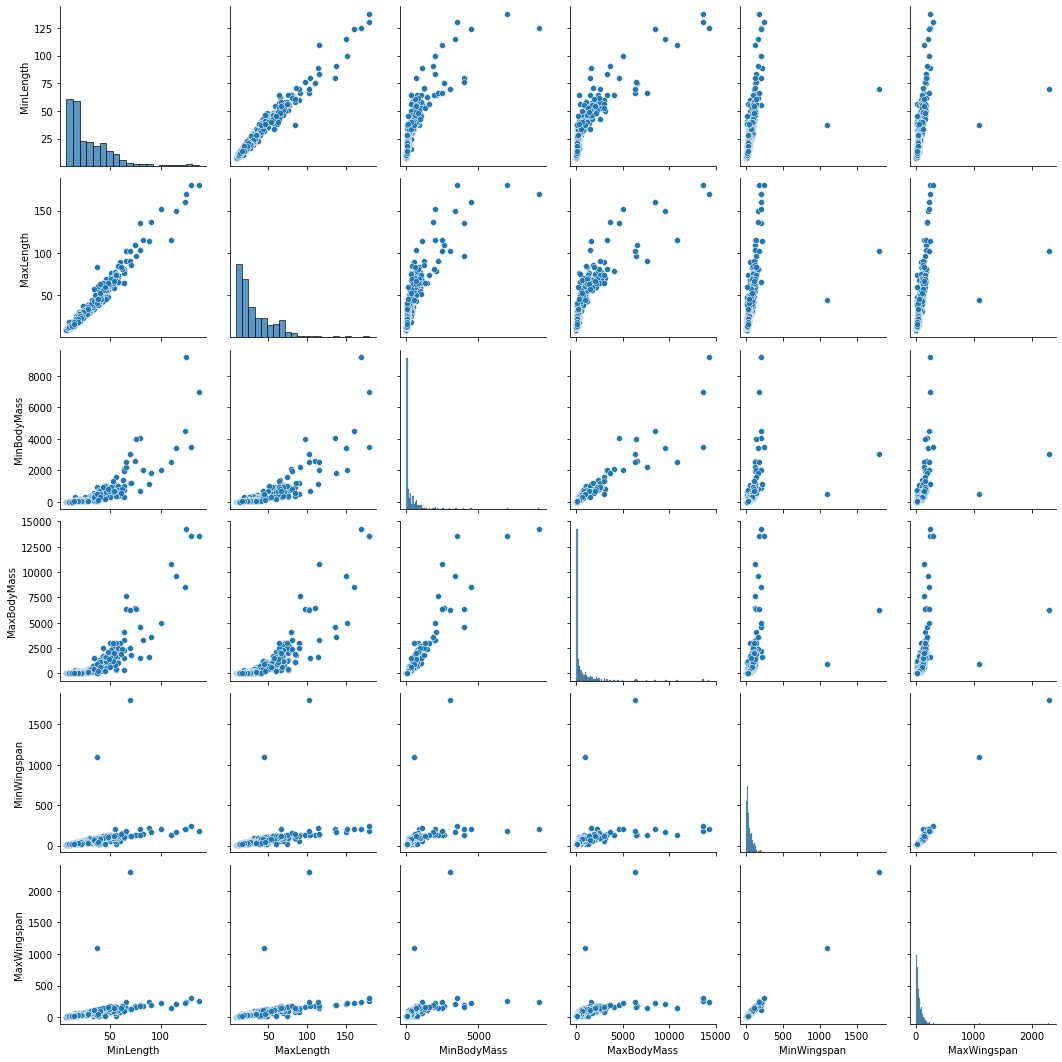

In [39]:
sns.pairplot(df)

In [40]:
df.corr()

,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
MinLength,1.000000,0.982290,0.813269,0.833797,0.429536,0.429874
MaxLength,0.982290,1.000000,0.824538,0.842841,0.442772,0.448038
MinBodyMass,0.813269,0.824538,1.000000,0.933166,0.401885,0.411347
MaxBodyMass,0.833797,0.842841,0.933166,1.000000,0.405611,0.421041
MinWingspan,0.429536,0.442772,0.401885,0.405611,1.000000,0.992093
MaxWingspan,0.429874,0.448038,0.411347,0.421041,0.992093,1.000000


<AxesSubplot:>

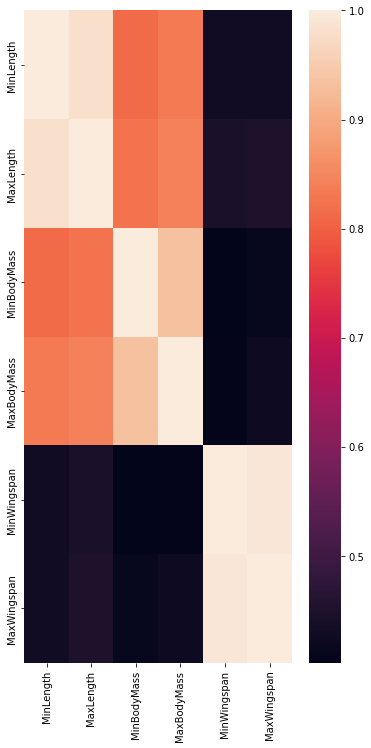

In [42]:
sns.heatmap(df.corr())

In [53]:
dfpie = df.groupby(['ConservationStatus']).count()
dfpie

,Name,ScientificName,Category,Order,Family,Genus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
ConservationStatus,,,,,,,,,,,,
CR,1,1,1,1,1,1,1,1,1,1,1,1
EN,2,2,2,2,2,2,2,2,2,2,2,2
EX,1,1,1,1,1,1,1,1,1,1,1,1
LC,402,402,402,402,402,402,402,402,402,402,402,402
NT,27,27,27,27,27,27,27,27,27,27,27,27
VU,10,10,10,10,10,10,10,10,10,10,10,10


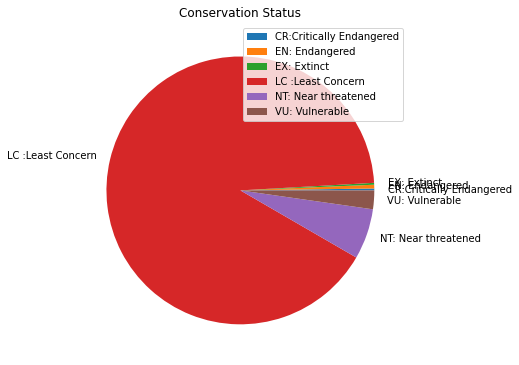

In [48]:
dfpie = df.groupby(['ConservationStatus']).count()
labels = ['CR:Critically Endangered', 'EN: Endangered', 'EX: Extinct', 'LC :Least Concern', 'NT: Near threatened', 'VU: Vulnerable' ]
plt.pie(dfpie['Name'], labels=labels)
plt.legend()
plt.title('Conservation Status')
plt.legend()
plt.show()